In [2]:
import pandas as pd

In [3]:
data = pd.read_excel('service-data.xlsx',skipinitialspace=True)
data.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [4]:
type(data.iloc[1,1])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# plt.plot(data.iloc[:,-1])

In [6]:
data['INVOICE LINE TEXT'].count().sum()

# data['Invoice Date'].dt.year

28449

In [7]:
forecastOne = data[['Job Card Date','INVOICE LINE TEXT']]

In [8]:
forecastOne = forecastOne.sort_values('Job Card Date')

In [9]:
forecastOne.head(20)

,Job Card Date,INVOICE LINE TEXT
0,2017-05-30,ENGINE OIL
23,2017-05-31,VALVE GRAINDING
24,2017-05-31,DISC PAD
25,2017-05-31,LOADING GEAR
26,2017-05-31,PACKING KIT
27,2017-05-31,TIMMING CHAIN PAD
28,2017-05-31,TENSIONER
29,2017-05-31,CLUTCH BELL REST
30,2017-05-31,ENGINE OIL
31,2017-05-31,CLUTCH ASSEMBLY


In [10]:
column_name = ['Date','Stock']
forecastOne.columns = column_name

In [11]:
print(forecastOne.shape)
forecastOne = forecastOne[:-3]
print(forecastOne.shape)

(28484, 2)
(28481, 2)


In [12]:
forecastOne.head(40)

,Date,Stock
0,2017-05-30,ENGINE OIL
23,2017-05-31,VALVE GRAINDING
24,2017-05-31,DISC PAD
25,2017-05-31,LOADING GEAR
26,2017-05-31,PACKING KIT
27,2017-05-31,TIMMING CHAIN PAD
28,2017-05-31,TENSIONER
29,2017-05-31,CLUTCH BELL REST
30,2017-05-31,ENGINE OIL
31,2017-05-31,CLUTCH ASSEMBLY


In [13]:
def individualStock(stock_name):
    forecastOne.loc[forecastOne.Stock == stock_name, 'Stock'] = 1
    forecastOne.loc[forecastOne.Stock != 1, 'Stock'] = 0
    # Converting yyyy-mm-dd to yyyy-mm-01
    year = 2017
    month = 5
    tempYear = 0
    tempMonth = 0
    stockCount = 0
    dateColumn = []
    stockColumn = []
    for i, j in forecastOne.iterrows():
        try:
            tempYear = j.Date.year
            tempMonth = j.Date.month


            if(tempYear == year and tempMonth == month):
                stockCount += j.Stock
            else:
                dateColumn.append(str(year)+"-"+str(month)+"-1")
                stockColumn.append(stockCount)
                stockCount = 0
                year = tempYear
                month = tempMonth
                stockCount += j.Stock
            
        except:
            continue
    
    #Creating dictionary with date(yyyy-mm-01) and stock of that whole month
    final_dict = {'Date':dateColumn,'Stock':stockColumn}
    
    # Converting final_dict to dataframe
    from pandas import datetime
    def parser(x):
        return datetime.strptime(x,'%Y-%m-%d')
    individualStock = pd.DataFrame(final_dict)
    individualStock.Date = individualStock.Date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
    individualStock.set_index('Date', inplace = True)
    
    
    
    return individualStock
    
    
    
    
    
    
    

In [14]:
def individualStock2(stock_name):
    forecastOne.loc[forecastOne.Stock == stock_name, 'Stock'] = 1
    forecastOne.loc[forecastOne.Stock != 1, 'Stock'] = 0
    # Converting yyyy-mm-dd to yyyy-mm-01
    year = 2017
    month = 5
    day = 30
    tempYear = 0
    tempMonth = 0
    tempDay = 0
    stockCount = 0
    
    monthStart = False
    
    dateColumn = []
    stockColumn = []
    for i, j in forecastOne.iterrows():
        try:
            tempYear = j.Date.year
            tempMonth = j.Date.month
            tempDay = j.Date.day
            count = j.Stock


            if(tempYear == year and tempMonth == month) :
                if tempDay < 16:
                    stockCount += count
#                     print("first half of month ",tempYear,tempMonth,tempDay,stockCount)
                else:
                    if monthStart:
                        dateColumn.append(str(year)+"-"+str(month)+"-1")
                        stockColumn.append(stockCount)
                        stockCount = 0
                        monthStart = False
                    else:
                        stockCount += count
#                         print("second half of month ",tempYear,tempMonth,tempDay,stockCount)

            else:
                dateColumn.append(str(year)+"-"+str(month)+"-15")
                stockColumn.append(stockCount)
                stockCount = 0
                year = tempYear
                month = tempMonth
                stockCount += count
                monthStart = True
                
                    
        except:
            continue
            
    #Creating dictionary with date(yyyy-mm-01) and stock of that whole month
    final_dict = {'Date':dateColumn,'Stock':stockColumn}
#     print(dateColumn)
    
    # Converting final_dict to dataframe
    from pandas import datetime
    def parser(x):
        return datetime.strptime(x,'%Y-%m-%d')
    individualStock = pd.DataFrame(final_dict)
    individualStock.Date = individualStock.Date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
    individualStock.set_index('Date', inplace = True)
    
    
    
    return individualStock
    
    

In [15]:
stock = individualStock2('ENGINE OIL')

In [16]:
stock.head()

,Stock
Date,
2017-05-15,7
2017-06-01,87
2017-06-15,90
2017-07-01,90
2017-07-15,82


In [29]:
stock.shape

(39, 1)

In [30]:
#Plotting the trend in graph
import matplotlib.pyplot as plt
plt.plot(stock)
plt.xticks(rotation = 90)
plt.show()

/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 1 Axes>

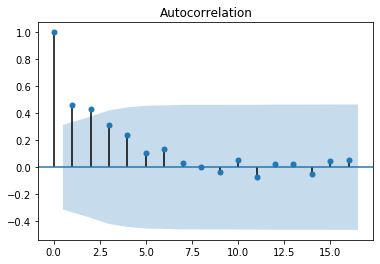

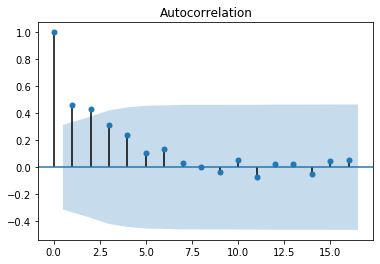

In [55]:
stock_diff = stock.diff(periods=2)
stock_diff = stock[1:]
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stock)

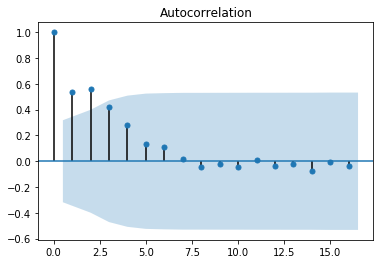

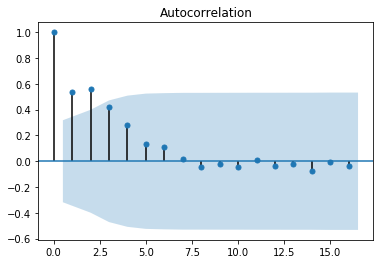

In [56]:
plot_acf(stock_diff)

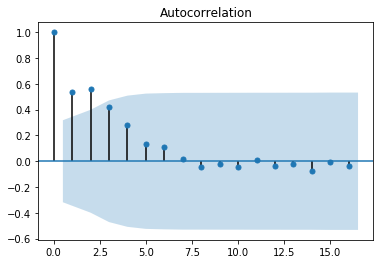

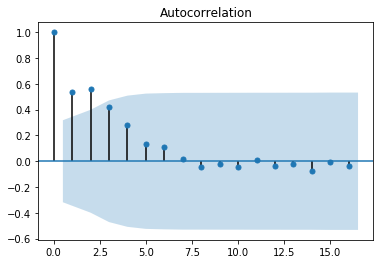

In [57]:
stock_diff = stock_diff.diff(periods=1)
stock_diff = stock[1:]
plot_acf(stock_diff)
# print(stock_diff)

In [58]:
asd = stock_diff
test = asd.diff(periods=1)
print(test)

            Stock
Date             
2017-06-01    NaN
2017-06-15    9.0
2017-07-01    0.0
2017-07-15   -7.0
2017-08-01    1.0
2017-08-15  -10.0
2017-09-01    6.0
2017-09-15   -4.0
2017-10-01    9.0
2017-10-15  -18.0
2017-11-01   31.0
2017-11-15  -24.0
2017-12-01    2.0
2017-12-15    6.0
2018-01-01   -6.0
2018-01-15   -6.0
2018-02-01   10.0
2018-02-15   -5.0
2018-03-01    8.0
2018-03-15    6.0
2018-04-01   -2.0
2018-04-15    3.0
2018-05-01  -12.0
2018-05-15    5.0
2018-06-01  -11.0
2018-06-15    8.0
2018-07-01    4.0
2018-07-15  -11.0
2018-08-01   10.0
2018-08-15    0.0
2018-09-01   15.0
2018-09-15   -3.0
2018-10-01    1.0
2018-10-15   11.0
2018-11-01   -5.0
2018-11-15   -1.0
2018-12-01   10.0
2018-12-15   -2.0


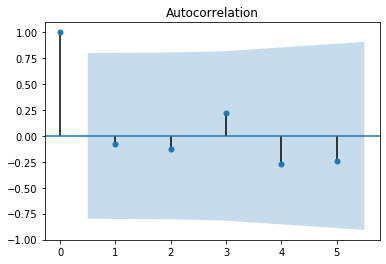

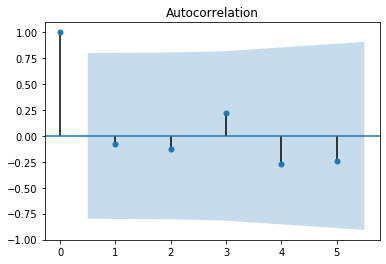

In [80]:
test = test[1:]
plot_acf(test)

In [82]:
from pandas import datetime
def parser(x):
    return datetime.strptime(x,'%Y-%m')
sales = pd.read_csv('../../Downloads/attachment_sales-cars.csv', parse_dates=[0],index_col=0, date_parser = parser)
sales.columns = ['Sales']
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [31]:
X = stock.values
print(X.shape)

(39, 1)


In [32]:
train = X[0:32]
test = X[32:]
print(test.shape, train.shape)

(7, 1) (32, 1)


In [33]:
train

array([[  7],
       [ 87],
       [ 90],
       [ 90],
       [ 82],
       [ 78],
       [ 68],
       [ 94],
       [ 93],
       [102],
       [ 55],
       [ 96],
       [ 94],
       [102],
       [113],
       [ 77],
       [ 75],
       [114],
       [ 85],
       [112],
       [103],
       [105],
       [102],
       [ 94],
       [117],
       [105],
       [111],
       [113],
       [ 95],
       [101],
       [103],
       [105]])

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
def findPDQ():
    p=0
    d=0
    q=0
    min_value_aic = float("inf")
    for i in range(0,5):
        for j in range(0,5):
            for k in range(0,5):
                try:
                    model_arima = ARIMA(train,order = (i,j,k))
                    model_arima_fit = model_arima.fit()
                    aic = model_arima_fit.aic
                    if aic<min_value_aic:
                        min_value_aic = aic
                        p=i
                        d=j
                        q=k
                except:
                    continue
    return [p,d,q]

In [36]:
pdq = findPDQ();

/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in

In [37]:
print(pdq)
model_arima = ARIMA(train,order = (pdq[0], pdq[1], pdq[2]))

# model_arima = ARIMA(train,order = (0, 2, 1))
model_arima_fit = model_arima.fit()
aic = model_arima_fit.aic
print(aic)
predictions = []

[0, 2, 3]
272.60935016059875


/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [38]:
predictions = model_arima_fit.forecast(steps = 7)[0]

In [39]:
print(predictions,test)

[115.69717596 104.16496406 103.38452213 102.54992619 101.66117624
 100.71827229  99.72121433] [[111]
 [118]
 [123]
 [ 90]
 [109]
 [121]
 [121]]


array([115.69717596, 104.16496406, 103.38452213, 102.54992619,
       101.66117624, 100.71827229,  99.72121433])

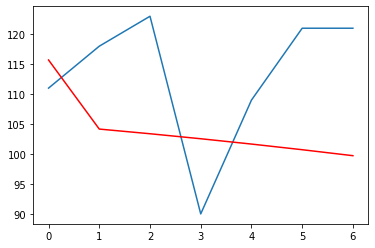

In [40]:
plt.plot(test)
plt.plot(predictions, color = 'red')
predictions

In [78]:
model_arima = ARIMA(train,order = (0,2,1))

In [46]:
model_arima_fit = model_arima.fit()

In [105]:
predictions = model_arima_fit.forecast(steps = 12)[0]

In [106]:
print(model_arima_fit.aic)

195.50007541478578


In [107]:
predictions

array([28.57531286, 28.69191879, 28.80852473, 28.92513067, 29.04173661,
       29.15834255, 29.27494848, 29.39155442, 29.50816036, 29.6247663 ,
       29.74137224, 29.85797817])

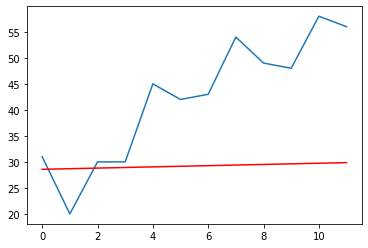

In [108]:
plt.plot(test)
plt.plot(predictions, color = 'red')

In [198]:
type(forecastOne['Date'])

pandas.core.series.Series

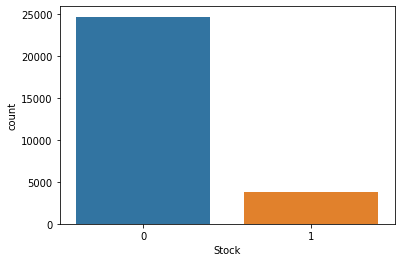

In [232]:
# forecastOne.head()
import seaborn as sn
sn.countplot(forecastOne.Stock)

In [233]:
# from sklearn.preprocessing import LabelEncoder

In [234]:
columnNames = ['Date','Stock']

In [235]:
forecastOne.columns = columnNames

In [236]:
forecastOne.head()

,Date,Stock
0,2017-05-30,1
1,2017-06-02,1
2,2017-06-02,0
3,2017-06-02,0
4,2017-06-02,0


In [240]:
# import seaborn as sn
# sn.countplot(forecastOne[forecastOne.Stock=='ENGINE OIL'])

In [241]:
forecastOne['Date'] = parser(forecastOne['Date'])

TypeError: strptime() argument 1 must be str, not Series

In [238]:
import matplotlib.pyplot as plt
plt.plot(forecastOne[1:5]);


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fde14ad05f0> (for post_execute):


ValueError: view limit minimum -36824.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36824.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [135]:
Counter(forecastOne.Stock)

Counter({'ENGINE OIL': 3802,
         'POLISH': 1245,
         'CONSUMABLES': 1595,
         'COOLANT OIL': 70,
         'CHAIN LUBRICATION': 3441,
         '4 WAY SWITCH': 2,
         '3M OIL': 1628,
         'GENERAL SERVICE': 2142,
         'OIL FILTER': 821,
         'INDICATOR': 110,
         'HEAD REST': 56,
         'VALVE GUIDE': 63,
         'TIMMING CHAIN': 78,
         'FOOT REST': 99,
         'LOW BEAM BULB': 12,
         'VALVE GRAINDING': 63,
         'DISC PAD': 575,
         'LOADING GEAR': 53,
         'PACKING KIT': 56,
         'TIMMING CHAIN PAD': 73,
         'TENSIONER': 79,
         'CLUTCH BELL REST': 21,
         'CLUTCH ASSEMBLY': 212,
         'VALVE KIT': 66,
         'SPARK PLUG': 421,
         'ONE WAY CLUTCH': 5,
         'BORE KIT': 53,
         'AIR FILTER': 1715,
         'HEAD RUBBER': 18,
         'CLUTCH CABLE': 263,
         'CRANK SHAFT': 50,
         'BRAKE ADJUSTMENT': 7,
         'BRAKE SHOE': 965,
         'AIR FILTER CHECKUP': 467,
         

In [136]:
labelEncoder= LabelEncoder()

In [137]:
# forecastOne.Stock = labelEncoder.fit_transform(forecastOne.Stock.astype(str))

In [138]:
forecastOne.head()

,Date,Stock
0,2017-05-30,ENGINE OIL
1,2017-06-02,ENGINE OIL
2,2017-06-02,POLISH
3,2017-06-02,CONSUMABLES
4,2017-06-02,COOLANT OIL


In [114]:
from collections import Counter

In [140]:
Counter(forecastOne.Stock)

Counter({'ENGINE OIL': 3802,
         'POLISH': 1245,
         'CONSUMABLES': 1595,
         'COOLANT OIL': 70,
         'CHAIN LUBRICATION': 3441,
         '4 WAY SWITCH': 2,
         '3M OIL': 1628,
         'GENERAL SERVICE': 2142,
         'OIL FILTER': 821,
         'INDICATOR': 110,
         'HEAD REST': 56,
         'VALVE GUIDE': 63,
         'TIMMING CHAIN': 78,
         'FOOT REST': 99,
         'LOW BEAM BULB': 12,
         'VALVE GRAINDING': 63,
         'DISC PAD': 575,
         'LOADING GEAR': 53,
         'PACKING KIT': 56,
         'TIMMING CHAIN PAD': 73,
         'TENSIONER': 79,
         'CLUTCH BELL REST': 21,
         'CLUTCH ASSEMBLY': 212,
         'VALVE KIT': 66,
         'SPARK PLUG': 421,
         'ONE WAY CLUTCH': 5,
         'BORE KIT': 53,
         'AIR FILTER': 1715,
         'HEAD RUBBER': 18,
         'CLUTCH CABLE': 263,
         'CRANK SHAFT': 50,
         'BRAKE ADJUSTMENT': 7,
         'BRAKE SHOE': 965,
         'AIR FILTER CHECKUP': 467,
         

# Forecasting with Keras

In [110]:
import numpy as np

In [111]:
print(np.min(train),np.max(train))

1 45


In [113]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler = MinMaxScaler(feature_range = (0,1))

In [156]:
X = stock.values

In [190]:
train_set_scaled = scaler.fit_transform(X)

In [158]:
print(np.min(train_scaled),np.max(train_scaled))

MinMaxScaler(copy=True, feature_range=(0, 1)) MinMaxScaler(copy=True, feature_range=(0, 1))


In [212]:
np.min(train_scaled)
X_train = []
y_train = []

In [213]:
for i in range(5,len(train_set_scaled)):
    X_train.append(train_set_scaled[i-5:i,0])
    y_train.append(train_set_scaled[i,0])

In [214]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [195]:
train = train_set_scaled[0:32,0]
test = train_set_scaled[32:,0]

In [196]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [197]:
from keras.models import Sequential

In [201]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [202]:
regressor = Sequential()

In [203]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [205]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [206]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [207]:

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [208]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [209]:
regressor.add(Dense(units = 1))

In [210]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
regressor.fit(X_train,y_train,epochs = 100, batch_size=32)

NameError: name 'regressor' is not defined

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:

dataset_train = stock[0:28]
training_set = dataset_train.values
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(5,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-5:i,0])
    y_train.append(training_set_scaled[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)
# for i in range(2, 40):
#     X_train.append(training_set_scaled[i-2:i, 0])
#     y_train.append(training_set_scaled[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = stock[28:]
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Stock'], dataset_test['Stock']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(5, 15):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
# plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
# plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
# plt.title('Google Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
# plt.legend()
# plt.show()

Epoch 1/100
23/23 [==============================] - 10s 421ms/step - loss: 0.6759
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6546
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6361
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6166
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5927
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5707
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5468
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5118
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4794
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4543
Epoch 11/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4045
Epoch 12/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3529
Epoch 13/100
23/23 [==============

In [40]:
real_stock_price = stock[28:].values
print(predicted_stock_price, real_stock_price)

[[ 99.4338  ]
 [101.875015]
 [100.4264  ]
 [100.68732 ]
 [ 99.66524 ]
 [ 97.813774]
 [ 99.1659  ]
 [100.15579 ]
 [101.27258 ]
 [102.40268 ]] [[ 95]
 [101]
 [103]
 [105]
 [111]
 [118]
 [123]
 [ 90]
 [109]
 [121]
 [121]]


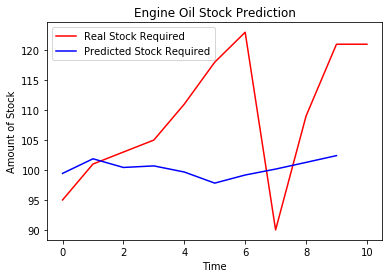

In [43]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Required')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Required')
plt.title('Engine Oil Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Amount of Stock')
plt.legend()
plt.show()